# Assignment

##  Learning the XOR

In [1]:
import tensorflow as tf
import numpy as np

tf.reset_default_graph()
%matplotlib inline

In [2]:
xor_data = np.array([[1, 0],
                    [0, 1],
                    [1, 1],
                    [0, 0]])
xor_label = np.array([[1], [1], [0], [0]])

In [3]:
def fc_layer(x_input, out_dim, name='fc'):
    in_dim = x_input.shape[-1]
    with tf.variable_scope(name, reuse=tf.AUTO_REUSE):
        weights = tf.get_variable("weights", shape=[in_dim, out_dim])
        bias = tf.get_variable("bias", shape=[out_dim])
#         out = tf.matmul(x_input, weights) + bias
        out = x_input @ weights + bias
        return tf.sigmoid(out), weights, bias

In [11]:
with tf.Graph().as_default() as g:
    x_input = tf.placeholder(tf.float32, [None, 2])
    y_label = tf.placeholder(tf.float32, [None, 1])
    
    num_neurons = 3
    classes = y_label.shape[-1]
    fc, input_weights, input_bias = fc_layer(x_input, num_neurons, name='fc')
    out, hidden_weights, hidden_bias = fc_layer(fc, classes, name='logits')
    
    loss = tf.reduce_mean(-1 * (y_label*tf.log(out) + (1-y_label)*tf.log(1-out)))
#     loss = tf.reduce_mean(tf.square(y_label - out))
    train_op = tf.train.GradientDescentOptimizer(0.1).minimize(loss)
    
    var_init_op = tf.global_variables_initializer()
    # start building your model and meet the requirements
    # from here
    
with tf.Session(graph=g) as sess:
    # start run the seesion and meet the requrements
    # from here 
    sess.run(var_init_op)
    cost = []
    for i in range(10000):
        _, loss_, out_ = sess.run([train_op, loss, out], feed_dict={x_input:xor_data, y_label:xor_label})  
        cost.append(loss_)
    p_label = sess.run(tf.round(out_))
    print('Input layer weights: {}'.format(sess.run(input_weights)))
    print('Input layer bias: {}'.format(sess.run(input_bias)))
    print('Hidden weights: {}'.format(sess.run(hidden_weights)))
    print('Hidden layer bias: {}'.format(sess.run(hidden_bias)))
    
    print(sess.run(out, feed_dict={x_input:xor_data, y_label:xor_label}))

Input layer weights: [[-3.9795322  4.779998   6.129201 ]
 [ 3.7440898 -4.525801  -6.2416615]]
Input layer bias: [-2.2031686  2.5542862 -3.2194376]
Hidden weights: [[ 5.3119   ]
 [-6.5702815]
 [10.356645 ]]
Hidden layer bias: [0.9222059]
[[0.98505974]
 [0.98895663]
 [0.01108743]
 [0.01409655]]


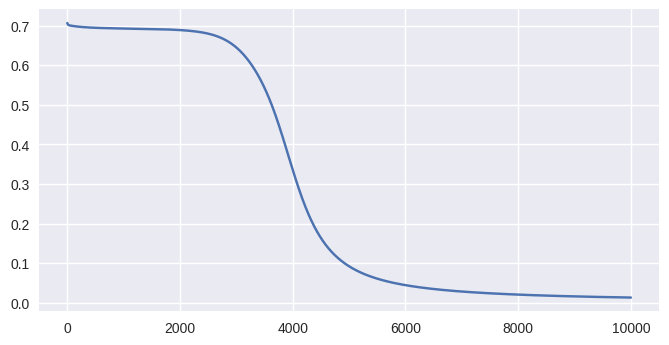

In [12]:
import matplotlib.pyplot as plt
plt.style.use('seaborn')

fig, ax = plt.subplots(dpi=100, figsize=(8, 4))
ax.plot(range(len(cost)), cost)
plt.show()

In [13]:
from sklearn.metrics import accuracy_score
acc = accuracy_score(xor_label, p_label)
print('Accuracy :{}'.format(acc))

Accuracy :1.0


## MNIST - Digits classification

In [1]:
from tensorflow.examples.tutorials.mnist import input_data
# load mnist data
mnist = input_data.read_data_sets("data/mnist", one_hot=True)

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting data/mnist/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting data/mnist/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting data/mnist/t10k-images-idx3-ubyte.gz
Extracting data/mnist/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


In [2]:
train_data = mnist.train.images
train_label = mnist.train.labels

in_dim = train_data.shape[-1]
out_dim = train_label.shape[-1]

In [13]:
with tf.Graph().as_default() as g:
    x_input = tf.placeholder(tf.float32, [None, in_dim])
    y_label = tf.placeholder(tf.float32, [None, out_dim])
    
    training_dataset = tf.data.Dataset.from_tensor_slices((train_data, train_label))
    training_dataset = training_dataset.batch(100)
    training_iterator = training_dataset.make_initializable_iterator()
    batch_xs, batch_ys = training_iterator.get_next()
    
    fc1_weights = tf.get_variable("fc1_weights", shape=[in_dim, 1024])
    fc1_bias = tf.get_variable("fc1_bias", shape=[1024])
    fc1_out = tf.nn.relu(tf.matmul(x_input, fc1_weights) + fc1_bias)
    
    fc2_weights = tf.get_variable("fc2_weights", shape=[1024, out_dim])
    fc2_bias = tf.get_variable("fc2_bias", shape=[out_dim])
    fc2_out = tf.matmul(fc1_out, fc2_weights) + fc2_bias
    out = tf.nn.softmax(fc2_out)
    
    loss = -tf.reduce_sum(y_label * tf.log(out))
    
    train_op = tf.train.GradientDescentOptimizer(0.01).minimize(loss)
    
    correct_prediction = tf.equal(tf.argmax(out, 1), tf.argmax(y_label, 1))  
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
    
    var_init_op = tf.global_variables_initializer()

with tf.Session(graph=g) as sess:
    sess.run(var_init_op)
    for i in range(10):
        sess.run(training_iterator.initializer)
        try:
            while (True):
                x_, y_ = sess.run([batch_xs, batch_ys])
                _, loss_, out_ = sess.run([train_op, loss, out], feed_dict={x_input:x_, y_label:y_}) 
        except tf.errors.OutOfRangeError:
            pass
        
        train_accuracy = accuracy.eval(feed_dict={x_input:train_data, y_label:train_label})
        print ("step {}, training acc {:.3f}".format(i+1, train_accuracy))
            
    test_accuracy = accuracy.eval(feed_dict={x_input:mnist.test.images, y_label:mnist.test.labels})
    print("test accuracy: {:.2f}".format(test_accuracy))
    

step 1, training acc 0.956
step 2, training acc 0.973
step 3, training acc 0.983
step 4, training acc 0.989
step 5, training acc 0.992
step 6, training acc 0.994
step 7, training acc 0.996
step 8, training acc 0.998
step 9, training acc 0.998
step 10, training acc 0.999
test accuracy: 0.98
